# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [110]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

np.set_printoptions(precision=4)

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Import data**

In [111]:
df_orig = pandas.read_csv('data/Chefbot_Dataset - All.csv', encoding='utf-8')

In [112]:
# Display the first 5 rows of the dataframe
display(df_orig.head(n=5))
# Display the last 5 rows of the dataframe
display(df_orig.tail(n=5))

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


,Text,Mainclass,Subclass
571,เมนูที่เอาเส้นพาสต้ามาผัดกับของทะเลแล้วแล้วก็ใ...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
572,สปาเก็ตตี้ที่มีสีแดง และเขียวตัดกับ สีของเส้นท...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
573,ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อ หมู ไก...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
574,สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลั...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล
575,สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้าน มีกุ้ง มีหมึ...,สปาเก็ตตี้,สปาเก็ตตี้ทะเล


# **Data Preprocessing**

In [113]:
df_prepro = df_orig.copy()

## **Data Cleaning**

In [114]:
display(df_prepro.describe())
display(df_prepro.Mainclass.unique())
display(df_prepro.Subclass.unique())

,Text,Mainclass,Subclass
count,576,576,576
unique,576,3,12
top,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
freq,1,192,48


array(['พิซซ่า', 'ก๋วยเตี๋ยว', 'สปาเก็ตตี้'], dtype=object)

array(['ค็อกเทลกุ้ง', 'มีทเดอลุกซ์', 'เห็ดและมะเขือเทศ', 'ดิปเปอร์',
       'ก๋วยเตี๋ยวน้ำตก', 'ก๋วยเตี๋ยวต้มยำน้ำใส', 'บะหมีหมูแดงหมูกรอบ',
       'เกาเหลา', 'สปาเก็ตตี้มีทบอล', 'สปาเก็ตตี้คาโบนาร่า',
       'สปาเก็ตตี้ผัก', 'สปาเก็ตตี้ทะเล'], dtype=object)

### **Remove Duplications in text inputs**

In [115]:
# display all text that appears more than once
display(df_prepro[df_prepro.duplicated('Text', keep=False)].sort_values('Text'))
# Then no duplicates

,Text,Mainclass,Subclass


### **Remove unwanted character**

#### **Front-Back white space**

In [116]:
def strip_space(text):
    return text.strip()

df_prepro['Text'] = df_prepro['Text'].apply(strip_space)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove white space between words**

In [117]:
def remove_whitespace(text):
    return text.replace(" ", "")

df_prepro['Text'] = df_prepro['Text'].apply(remove_whitespace)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆกับน้ำสลัดเทาซันไอส...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมๆสามารถแบ่งเป็นชิ้นได้กินกั...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove special character and punctuation**

In [118]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
thai_punctuation = 'ๆ'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation + thai_punctuation))
 
df_prepro['Text'] = df_prepro['Text'].apply(remove_punctuation)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,ค็อกเทลกุ้ง


### **Label Mapping**

In [119]:
def get_label_map(df, col_name):
    label_map = {}
    for i, label in enumerate(df[col_name].unique()):
        label_map[label] = i
    reversed_label_map = {v: k for k, v in label_map.items()}
    return label_map, reversed_label_map

#### **Get main class labels**

In [120]:
mainclass_label_map, reversed_mainclass_label_map = get_label_map(df_prepro, 'Mainclass')

display(mainclass_label_map)

df_prepro['Mainclass'] = df_prepro['Mainclass'].map(mainclass_label_map)

display(df_prepro.head())

{'พิซซ่า': 0, 'ก๋วยเตี๋ยว': 1, 'สปาเก็ตตี้': 2}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,ค็อกเทลกุ้ง


#### **Get sub class labels**

In [121]:
subclass_label_map, reversed_subclass_label_map = get_label_map(df_prepro, 'Subclass')

display(subclass_label_map)

df_prepro['Subclass'] = df_prepro['Subclass'].map(subclass_label_map)

display(df_prepro.head())

{'ค็อกเทลกุ้ง': 0,
 'มีทเดอลุกซ์': 1,
 'เห็ดและมะเขือเทศ': 2,
 'ดิปเปอร์': 3,
 'ก๋วยเตี๋ยวน้ำตก': 4,
 'ก๋วยเตี๋ยวต้มยำน้ำใส': 5,
 'บะหมีหมูแดงหมูกรอบ': 6,
 'เกาเหลา': 7,
 'สปาเก็ตตี้มีทบอล': 8,
 'สปาเก็ตตี้คาโบนาร่า': 9,
 'สปาเก็ตตี้ผัก': 10,
 'สปาเก็ตตี้ทะเล': 11}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,0
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,0
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,0
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,0
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,0


## **Data Visualization**

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
def plot_sentence_length_distribution(df, col_name):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (12, 8)
    
    bin_size = 5
    bins = np.arange(0, 100, bin_size)
    plt.hist(df[col_name].str.len(), bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='train')
    xticks = np.arange(0, 150, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, 100, bin_size)
    plt.yticks(yticks, yticks)
    plt.title('Sentence Length Distribution')
    plt.legend(loc='upper right')
    plt.xlabel('Sentence Length')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name].str.len(), bins=bins)[0]):
        plt.text(a + 2.5, b + 2.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

### **Plotting the length of the text data**

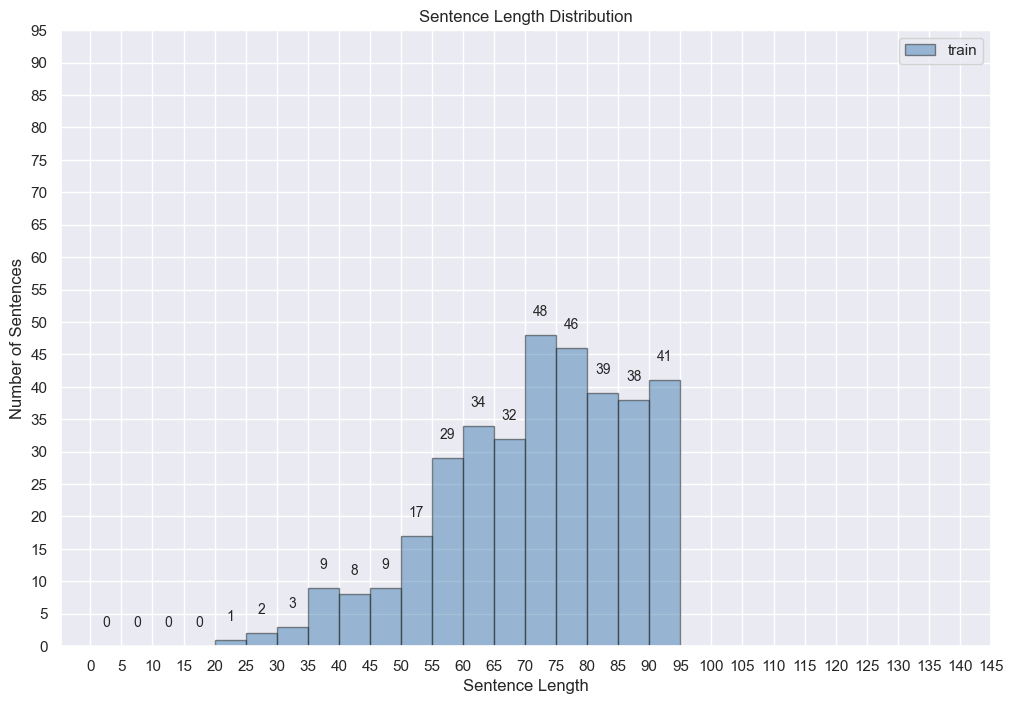

In [124]:
plot_sentence_length_distribution(df_prepro, 'Text')

#### **Maximum length of text inputs**

In [125]:
print('Max sentence length: %d' % df_prepro['Text'].str.len().max())

df_prepro['Text'].str.len().describe()

Max sentence length: 165


count    576.000000
mean      88.333333
std       26.587477
min       20.000000
25%       69.750000
50%       86.000000
75%      107.000000
max      165.000000
Name: Text, dtype: float64

### **Plot the distribution of labels**

In [126]:
def plot_label_distribution(df, col_name, title):
    
    sns.set_style('darkgrid')
    sns.set(font_scale=1.0)
    plt.rcParams['figure.figsize'] = (6, 4)
    
    bin_size = 1
    bins = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.hist(df[col_name], bins=bins, alpha=0.5, color='steelblue', edgecolor='k', label='data')
    xticks = np.arange(0, df[col_name].nunique() + 1, bin_size)
    plt.xticks(xticks, xticks)
    yticks = np.arange(0, df[col_name].value_counts().max() + 100, 500)
    plt.yticks(yticks, yticks)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xlabel('Object')
    plt.ylabel('Number of Sentences')
    for a, b in zip(bins, np.histogram(df[col_name], bins=bins)[0]):
        plt.text(a + 0.5, b + 0.5, '%d' % b, ha='center', va='bottom', fontsize=10)
    plt.show()

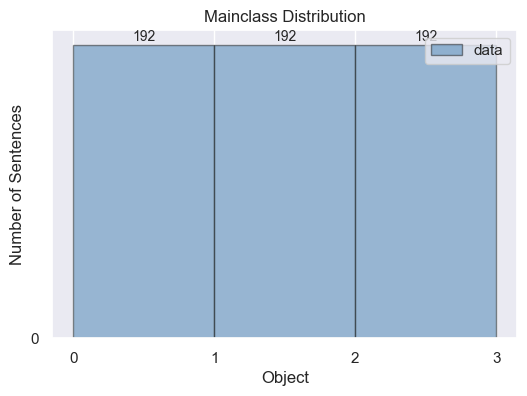

In [127]:
plot_label_distribution(df_prepro, 'Mainclass', 'Mainclass Distribution')

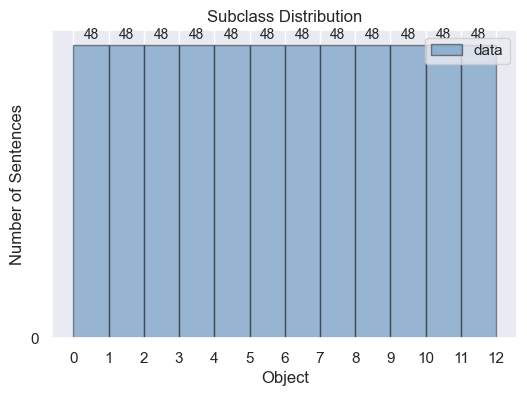

In [128]:
plot_label_distribution(df_prepro, 'Subclass', 'Subclass Distribution')

# **Keras Preprocessing**

In [129]:
df_keras = df_prepro.copy()

In [130]:
df_keras = df_keras.to_numpy()
df_keras

array([['อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์แลนด์ที่มีความเข้มข้นหอมแป้งเยอะ',
        0, 0],
       ['ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามสามารถหยิบกินได้เป็นชิ้นเน้นเนื้อที่มาจากทะเล',
        0, 0],
       ['ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ชื่นชอบอาหารทะเลราคาไม่แพงหาซื้อได้ง่าย',
        0, 0],
       ...,
       ['ฉันอยากกินสปาเก็ตตี้แต่ฉันเบื่อพวกเนื้อหมูไก่แล้วช่วยแนะนำเมนูให้ฉันหน่อย',
        2, 11],
       ['สปาเก็ตตี้ที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์', 2, 11],
       ['สปาเก็ตตี้ที่ให้รสชาติเผ็ดจัดจ้านมีกุ้งมีหมึกมีหอยและยังใส่พวกพริกไทยอ่อน',
        2, 11]], dtype=object)

In [131]:
sentences = df_keras[:, 0]
mainclass_labels = df_keras[:, 1]
subclass_labels = df_keras[:, 2]

## **Sentence Vectorization**

In [132]:
from pythainlp.word_vector import WordVector

thai_wv = WordVector()

In [133]:
def get_sentence_vector(word):
    try:
        data = thai_wv.sentence_vectorizer(word)
        return data[0]
    except:
        print("Error")
        return np.zeros((300,))

In [134]:
sentence_vectors = np.array([get_sentence_vector(sentence) for sentence in sentences])

In [135]:
print('Sentence vectors shape:', sentence_vectors.shape)

Sentence vectors shape: (576, 300)


### **One-hot encoding**

In [136]:
from keras.utils import to_categorical

mainclass_labels = to_categorical(mainclass_labels)
subclass_labels = to_categorical(subclass_labels)

print('Mainclass labels shape:', mainclass_labels.shape)
print('Subclass labels shape:', subclass_labels.shape)

Mainclass labels shape: (576, 3)
Subclass labels shape: (576, 12)


## **Train-Test Split**

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, mainclass_labels, test_size=0.2, random_state=42)

# **Modeling**

In [138]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

In [139]:
input_layer = Input(shape=(300,))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(3, activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               38528     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 48,963
Trainable params: 48,963
Non-trainable params: 0
_________________________________________________________________


In [140]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train type: {type(X_train)}')
print(f'y_train type: {type(y_train)}')

X_train shape: (460, 300)
y_train shape: (460, 3)
X_test shape: (116, 300)
y_test shape: (116, 3)
X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>


In [141]:
print(f'X_test type: {type(X_test[0])}')

X_test type: <class 'numpy.ndarray'>


In [142]:
model.fit(X_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
58/58 [==============================] - 1s 8ms/step - loss: 1.0849 - accuracy: 0.3674
Epoch 2/10
58/58 [==============================] - 0s 4ms/step - loss: 1.0207 - accuracy: 0.5304
Epoch 3/10
58/58 [==============================] - 0s 4ms/step - loss: 0.7835 - accuracy: 0.7043
Epoch 4/10
58/58 [==============================] - 0s 4ms/step - loss: 0.5936 - accuracy: 0.7565
Epoch 5/10
58/58 [==============================] - 0s 4ms/step - loss: 0.4407 - accuracy: 0.8239
Epoch 6/10
58/58 [==============================] - 0s 4ms/step - loss: 0.3422 - accuracy: 0.8696
Epoch 7/10
58/58 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.8826
Epoch 8/10
58/58 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.9065
Epoch 9/10
58/58 [==============================] - 0s 5ms/step - loss: 0.2288 - accuracy: 0.9196
Epoch 10/10
58/58 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9565


In [143]:
# Predict
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [144]:
print(y_pred.shape)

(116, 3)


In [145]:
pred = np.argmax(y_pred, axis=1)

print(pred.shape)

(116,)


In [146]:
for i in range(10):
    print(f'Actual: {np.argmax(y_test[i])} Predicted: {pred[i]}')

Actual: 1 Predicted: 1
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1
Actual: 2 Predicted: 2
Actual: 2 Predicted: 0
Actual: 2 Predicted: 2
Actual: 1 Predicted: 0
Actual: 0 Predicted: 0
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1


# **Evaluation**

In [147]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

print(classification_report(np.argmax(y_test, axis=1), pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        42
           1       0.72      0.58      0.65        36
           2       0.88      0.79      0.83        38

    accuracy                           0.76       116
   macro avg       0.77      0.75      0.75       116
weighted avg       0.77      0.76      0.76       116



: 